In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

In [ ]:
def plot_loss_accuracy(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

In [ ]:
import numpy as np

with open(r'/content/drive/MyDrive/AutoEncoders/X_train.npy', 'rb') as f:
    X_train=np.load(f)

with open(r'/content/drive/MyDrive/AutoEncoders/X_test.npy', 'rb') as f:
    X_test=np.load(f)

In [ ]:
X_train.shape, X_test.shape

((72250, 5000), (12750, 5000))

In [ ]:
n_inputs=X_train.shape[1]
# define encoder
input=Input(shape=(n_inputs,))

# encoder level 1
e=Dense(n_inputs*2)(input)
e=BatchNormalization()(e)
e=LeakyReLU()(e)

# encoder level 2
e=Dense(n_inputs)(e)
e=BatchNormalization()(e)
e=LeakyReLU()(e)

# bottleneck
bottleneck=Dense(round(float(n_inputs)/2.0))(e)

# define decoder, level 1
d=Dense(n_inputs)(bottleneck)
d=BatchNormalization()(d)
d=LeakyReLU()(d)

# decoder level 2
d=Dense(n_inputs*2)(d)
d=BatchNormalization()(d)
d=LeakyReLU()(d)

# output layer
output=Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model=Model(inputs=input, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

#summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 10000)             50010000  
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 5000)              50005000  
                                                                 
 batch_normalization_1 (Batc  (None, 5000)             20000     
 hNormalization)                                             

In [ ]:
history=model.fit(X_train, X_train, epochs=25, verbose=2, validation_data=(X_test, X_test))

Epoch 1/25
2258/2258 - 235s - loss: 0.0114 - val_loss: 0.0015 - 235s/epoch - 104ms/step
Epoch 2/25
2258/2258 - 231s - loss: 0.0019 - val_loss: 0.0047 - 231s/epoch - 102ms/step
Epoch 3/25
2258/2258 - 231s - loss: 0.0013 - val_loss: 0.0012 - 231s/epoch - 102ms/step
Epoch 4/25
2258/2258 - 233s - loss: 6.4906e-04 - val_loss: 7.1432e-04 - 233s/epoch - 103ms/step
Epoch 5/25
2258/2258 - 231s - loss: 3.4259e-04 - val_loss: 2.8909e-04 - 231s/epoch - 102ms/step
Epoch 6/25
2258/2258 - 231s - loss: 2.1660e-04 - val_loss: 1.8586e-04 - 231s/epoch - 102ms/step
Epoch 7/25
2258/2258 - 231s - loss: 1.7420e-04 - val_loss: 1.5415e-04 - 231s/epoch - 102ms/step
Epoch 8/25
2258/2258 - 231s - loss: 1.4516e-04 - val_loss: 1.2545e-04 - 231s/epoch - 102ms/step
Epoch 9/25
2258/2258 - 232s - loss: 1.2131e-04 - val_loss: 1.0452e-04 - 232s/epoch - 103ms/step
Epoch 10/25
2258/2258 - 231s - loss: 1.0534e-04 - val_loss: 9.1398e-05 - 231s/epoch - 102ms/step
Epoch 11/25
2258/2258 - 234s - loss: 9.5533e-05 - val_loss: 8.3

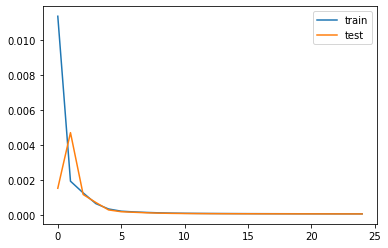

In [ ]:
plot_loss_accuracy(history)

In [ ]:
model.save('/content/drive/MyDrive/AutoEncoders/encoder_eff.h5')

In [ ]:
K.clear_session()

In [ ]:
#visible=Input(shape=(n_inputs,))
# define encoder
# encoder level 1
#e=Dense(n_inputs*2)(visible)
#e=BatchNormalization()(e)
#e=ReLU()(e)

# encoder level 2
#e=Dense(n_inputs)(e)
#e=BatchNormalization()(e)
#e=ReLU()(e)

# bottleneck
#n_bottleneck=round(float(n_inputs)/2.0)
#bottleneck=Dense(n_bottleneck)(e)

# define decoder, level 1
#d=Dense(n_inputs)(bottleneck)
#d=BatchNormalization()(d)
#d=ReLU()(d)

# decoder level 2
#d=Dense(n_inputs*2)(d)
#d=BatchNormalization()(d)
#d=ReLU()(d)

# output layer
#output=Dense(n_inputs, activation='linear')(d)

# define autoencoder model
#model=Model(inputs=visible, outputs=output)

# compile autoencoder model
#model.compile(optimizer='adam', loss='mse')

#summary
#model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 10000)             50010000  
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 5000)              50005000  
                                                                 
 batch_normalization_1 (Batc  (None, 5000)             20000     
 hNormalization)                                             

In [ ]:
#history=model.fit(X_train, X_train, epochs=30, verbose=2, validation_data=(X_test, X_test))

Epoch 1/30
399/399 - 50s - loss: 0.1497 - val_loss: 0.0443 - 50s/epoch - 126ms/step
Epoch 2/30
399/399 - 41s - loss: 0.0499 - val_loss: 0.0573 - 41s/epoch - 102ms/step
Epoch 3/30
399/399 - 41s - loss: 0.0433 - val_loss: 0.0519 - 41s/epoch - 103ms/step
Epoch 4/30
399/399 - 41s - loss: 0.0406 - val_loss: 0.0357 - 41s/epoch - 102ms/step
Epoch 5/30
399/399 - 41s - loss: 0.0353 - val_loss: 0.0327 - 41s/epoch - 102ms/step
Epoch 6/30
399/399 - 40s - loss: 0.0337 - val_loss: 0.0323 - 40s/epoch - 101ms/step
Epoch 7/30
399/399 - 40s - loss: 0.0325 - val_loss: 0.0323 - 40s/epoch - 101ms/step
Epoch 8/30
399/399 - 40s - loss: 0.0327 - val_loss: 0.0323 - 40s/epoch - 101ms/step
Epoch 9/30
399/399 - 40s - loss: 0.0325 - val_loss: 0.0323 - 40s/epoch - 101ms/step
Epoch 10/30
399/399 - 40s - loss: 0.0324 - val_loss: 0.0323 - 40s/epoch - 101ms/step
Epoch 11/30
399/399 - 40s - loss: 0.0323 - val_loss: 0.0323 - 40s/epoch - 101ms/step
Epoch 12/30
399/399 - 40s - loss: 0.0327 - val_loss: 0.0323 - 40s/epoch - 

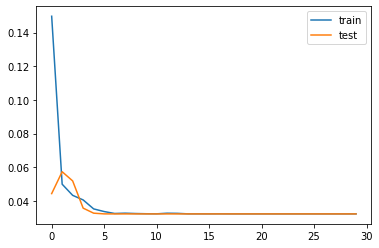

In [ ]:
#plot_loss_accuracy(history)

In [ ]:
#K.clear_session()

In [ ]:
#inputs
#visible=Input(shape=(n_inputs, ))


#Encoder

# -- Level:1
#e=Dense(round(float(n_inputs*1.5)))(visible)
#e=BatchNormalization()(e)
#e=LeakyReLU()(e)
# -- Level:2
#e=Dense(n_inputs)(e)
#e=BatchNormalization()(e)
#e=LeakyReLU()(e)


#Bottleneck

# -- Level:1
#b=Dense(round(float(n_inputs*0.5)))(e) ###Add Batchnorm
# -- Level:2
#b=Dense(round(float(n_inputs*0.5)))(b)


#Decoder

# -- Level:1
#d=Dense(n_inputs)(b)
#d=BatchNormalization()(d)
#d=LeakyReLU()(d)
# -- Level:2
#d=Dense(round(float(n_inputs*1.5)))(d)
#d=BatchNormalization()(d)
#d=LeakyReLU()(d)


#output
#output=Dense(n_inputs, activation='linear')(d)


# define autoencoder model
#model=Model(inputs=visible, outputs=output)

# compile autoencoder model
#model.compile(optimizer='adam', loss='mse')

#summary
#model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 7500)              37507500  
                                                                 
 batch_normalization (BatchN  (None, 7500)             30000     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7500)              0         
                                                                 
 dense_1 (Dense)             (None, 5000)              37505000  
                                                                 
 batch_normalization_1 (Batc  (None, 5000)             20000     
 hNormalization)                                             

In [ ]:
history=model.fit(X_train, X_train, epochs=30, validation_data=(X_test, X_test))

Epoch 1/30
399/399 [==============================] - 40s 92ms/step - loss: 0.0733 - val_loss: 0.0568
Epoch 2/30
399/399 [==============================] - 36s 90ms/step - loss: 0.0409 - val_loss: 0.0356
Epoch 3/30
399/399 [==============================] - 36s 91ms/step - loss: 0.0364 - val_loss: 0.0314
Epoch 4/30
399/399 [==============================] - 36s 90ms/step - loss: 0.0348 - val_loss: 0.0302
Epoch 5/30
399/399 [==============================] - 37s 93ms/step - loss: 0.0348 - val_loss: 0.0302
Epoch 6/30
399/399 [==============================] - 36s 90ms/step - loss: 0.0342 - val_loss: 0.0288
Epoch 7/30
399/399 [==============================] - 36s 90ms/step - loss: 0.0329 - val_loss: 0.0288
Epoch 8/30
399/399 [==============================] - 36s 90ms/step - loss: 0.0317 - val_loss: 0.0283
Epoch 9/30
399/399 [==============================] - 36s 90ms/step - loss: 0.0306 - val_loss: 0.0277
Epoch 10/30
399/399 [==============================] - 36s 90ms/step - loss: 0.029

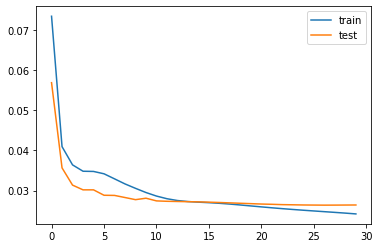

In [ ]:
plot_loss_accuracy(history)

In [ ]:
#model.save('/content/drive/MyDrive/AutoEncoders/encoder_v2.h5')

In [ ]:
K.clear_session()